#CSE 101: Computer Science Principles
####Stony Brook University
####Kevin McDonnell (ktm@cs.stonybrook.edu)
##Module 16: Classes and Objects



### Object-oriented Programming

To this point in the course we have been doing **procedural programming**, which means that our focus has been on implementing algorithms as functions to solve problems.

In **object-oriented programming** (OOP), our focus shifts to thinking more about how we structure and represent data. We still write algorithms, but these algorithms are at the service of **objects**. An object often represents a real-world object or entity that has characteristics (called **fields** or **attributes**) and actions that are associated with the object (**methods**).

For example, we could have an object that represents a car. It could have attributes like its color, make, model, engine type, etc. It could have associated actions (methods) for driving it, refilling its gas tank, opening and closing its doors, and so on. We would need to define a **class**, which is a new data type, that defines what attributes and methods all car objects possess.

### Example: A Class for Representing a Playing Card

Suppose we want to implement a card game like Poker or Gin Rummy. We will need some way of representing the playing cards. For each card, we need to represent its rank and suit.

In Python, we use the `class` keyword to define a new class and then write an `__init__` method used to **construct** or **initialize** objects of the class. Think of a class as a kind of blueprint from which we can construct many different, distinct objects. The `__init__` method provides the values for an object's fields that make it unique. "Special" methods start and end with double underscores.

In [ ]:
class Card:
    def __init__(self, new_rank, new_suit):
        self.rank = new_rank
        self.suit = new_suit

`self` is a required first parameter that refers to the object itself that is being created. More generally, `self` refers to the object that a method is acting upon. We provide two parameters to `__init__` that represent a new card's rank and suit. The notation `self.rank = new_rank` means that we are creating a new field for the object called `rank`, and we are assigning it the value of `new_rank` that was passed as an argument. Below we see how to create three `Card` objects using our class definition.

In [ ]:
card1 = Card('J', 'S')  # Jack of Spades
card2 = Card('2', 'C')  # 2 of Clubs
card3 = Card('A', 'D')  # Ace of Diamonds

To access the fields of an object, we use the **dot operator**.

In [ ]:
print(card1.rank)
print(card2.suit)

J
C


Each object has its own copies of the fields `rank` and `suit`. For this reason, fields are also called **instance variables** because each **instance** (object) of a class has its own, independent copies of these variables (fields).


### Converting an Object to a String

To convert an object into an easily-printed form, write the `__str__` and `__repr__` methods. `__str__` is intended to provide a readable string that summarizes the object, whereas `__repr__` is intended to provide a *representation* of a string that provides the full details.

`__str__` is automatically called if you attempt to print an object, whereas `__repr__` is automatically called if you simply give an object's variable name in Colab for display.

In [ ]:
class Card:
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit

    def __str__(self):
        return self.rank + self.suit
    
    def __repr__(self):
        return self.__str__()

In [ ]:
card1 = Card('J', 'S')
print(card1)  # calls __str__
card1  # cals __repr__

JS


JS

### Class Variables

Sometimes we have a value that should be associated with all objects of a class, not just a particular object. These are called **class variables** and can be accessed through the class name, rather than through `self`. We will create a class variable called `suits` that maps a suit's letter (`'C'`, `'D'`, `'H'` or `'S'`) to a different [Unicode symbol](https://www.compart.com/en/unicode/) for that suit. `__str__` should be updated to use the new symbols.

In [ ]:
print('\u2663 \u2666 \u2665 \u2660')

♣ ♦ ♥ ♠


In [ ]:
class Card:
    suits = {'C': '\u2663', 'D': '\u2666', 'H': '\u2665', 'S': '\u2660'}

    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit

    def __str__(self):
        return self.rank + Card.suits[self.suit]
    
    def __repr__(self):
        return self.__str__()

In [ ]:
card1 = Card('J', 'S')
card1

J♠

### Objects as Function and Method Arguments

Suppose we have a class for representing a point in 2D space.

In [ ]:
class Point:
    def __init__(self, x, y):
        self.x = x;
        self.y = y
    
    def __str_(self):
        return f'({self.x}, {self.y})'

Now we want to compute the 2D Euclidean distance between the two points. We can write a function that takes two `Point` objects as parameters and returns the distance.

In [ ]:
import math

def distance(point1, point2):
    return math.sqrt(math.pow(point1.x - point2.x, 2) + math.pow(point1.y - point2.y, 2))

An example of how to use this function is below.

In [ ]:
p1 = Point(1, 4)
p2 = Point(5, 3)
dist = distance(p1, p2)
dist

4.123105625617661

Methods can also take objects as parameters. Suppose we want to see if two `Point` objects represent the same position in 2D space. We need to define what it means for two `Point` objects to be equal in this way. We write the `__eq__` method, and then we can use `==` with objects to test for equality. If we don't write the `__eq__` method, then tests for equality won't work properly.

In [ ]:
p1 = Point(2, 2)
p2 = Point(2, 2)
p1 == p2

False

`p1 == p2` evaluates to `False` because Python is checking whether `p1` and `p2` point to the same object. It is not checking whether the *contents* of `p1` and `p2` are equal. Now we will fix this by writing `__eq__`.

In [ ]:
class Point:
    def __init__(self, x, y):
        self.x = x;
        self.y = y
    
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    
    def __str__(self):
        return f'({self.x}, {self.y})'

In [ ]:
p1 = Point(2, 2)
p2 = Point(2, 2)
p1 == p2

True

### Objects as Return Values

Imagine a set of points scattered about in 2D space that form a polygon. If we take the average of the $x$ and $y$ coordinates (separately), we get the *centroid* of the points. Think of it as the "middle" of the polyon. We can write a function that takes a list of `Point` objects and returns their centroid.

In [ ]:
def centroid(points):
    cent_x = cent_y = 0
    for p in points:
        cent_x += p.x
        cent_y += p.y
    cent_x /= len(points)
    cent_y /= len(points)
    return Point(cent_x, cent_y)

# Test case
pts = [Point(4, 1), Point(2, 7), Point(-3, 8), Point(-4, -2)]
cent = centroid(pts)
print(cent)

(-0.25, 3.5)


### Example: A Class for Representing a Bank Account

Create a class for representing a bank account with several fields:
* the account holder's name, a string
* the account number, an integer
* the account balance, a floating-point number

and methods to:
* make a deposit
* make a withdrawal

We also need a constructor and a `__str__` method.

In [ ]:
class Account:
    def __init__(self, name, account_number, initial_balance):
        self.name = name
        self.account_number = account_number
        self.balance = initial_balance

    def deposit(self, amount):
        self.balance += amount

    def withdraw(self, amount):
        self.balance -= amount
    
    def __str__(self):
        return f'{self.name} {self.account_number:012d} ${self.balance:0.2f}'

Now to test the class:

In [ ]:
checking = Account('Jacob', 9281124223, 1500)
savings = Account('Bonnie', 83639173271, 4000)
print(f'Checking: {checking}')
print(f'Savings: {savings}')
print('Deposit $100 into Jacob\'s checking account.')
checking.deposit(100)
print('Withdraw $250 from Bonnie\'s savings account.')
savings.withdraw(250)
print(f'Checking: {checking}')
print(f'Savings: {savings}')

Checking: Jacob 009281124223 $1500.00
Savings: Bonnie 083639173271 $4000.00
Deposit $100 into Jacob's checking account.
Withdraw $250 from Bonnie's savings account.
Checking: Jacob 009281124223 $1600.00
Savings: Bonnie 083639173271 $3750.00


### Example: A Class for Representing a Car

Create a class for representing a car with several fields:
* the VIN, a string
* the make, a string
* the model, a string
* the price, a floating-point number

In [ ]:
class Car:
    def __init__(self, vin, make, model, price):
        self.vin = vin
        self.make = make
        self.model = model
        self.price = price

    def __str__(self):
        return f'VIN: {self.vin} {self.make} {self.model} ${self.price:0.2f}'

In [ ]:
car1 = Car('XYZ123', 'Honda', 'Civic', 21000)
print(car1)
car2 = Car('ABC789', 'Hyundai', 'Elantra', 19000)
print(car2)

VIN: XYZ123 Honda Civic $21000.00
VIN: ABC789 Hyundai Elantra $19000.00


### Example: A Class for Representing a Car Dealership

Create a class for representing a car with two fields:
* the dealership's name, a string
* a list of `Car` objects for sale

When an object contains another object, we call it **aggregation**. 

In [ ]:
class Dealership:
    def __init__(self, name):
        self.name = name
        self.cars = []
    
    def add_car(self, car):
        self.cars.append(car)

    def __str__(self):
        result = f'{self.name}\n'
        for car in self.cars:
            result += f'    {car}\n'
        return result[:-1]  # remove the newline at the end

In [ ]:
dealer = Dealership('Totally-Not-Stolen Used Cars')
car1 = Car('HOT662', 'Honda', 'Accord', 5000)
car2 = Car('DED001', 'Ford', 'Taurus', 3000) 
dealer.add_car(car1)
dealer.add_car(car2)
print(dealer)

Totally-Not-Stolen Used Cars
    VIN: HOT662 Honda Accord $5000.00
    VIN: DED001 Ford Taurus $3000.00


### Comprehensive Example: Stock Market Simulation

Suppose we wish to simulate the change over time of a person's brokerage account. The person holds shares of stock in multiple companies whose prices vary over time. Suppose the person has invested in Apple (AAPL), Microsoft (MSFT) and Google (GOOG). The prices of the stocks move up and down randomly as follows.

AAPL share price:
* 25% of increasing \$8 each day
* 60% chance of not changing each day
* 15% of decreasing \$3 each day

MSFT share price:
* 15% of increasing \$5 each day
* 70% chance of not changing each day
* 15% of decreasing \$6 each day

GOOG share price:
* 35% of increasing \$5 each day
* 50% chance of not changing each day
* 15% of decreasing \$14 each day

First, we need a class to represent a company's stock and a holding of that stock for an investor.

In [ ]:
class Stock:
    def __init__(self, company, price):
        self.company = company
        self.price = price
    
    def __str__(self):
        return f'{self.company} ${self.price:0.2f}'

class Holding:
    def __init__(self, purchase_id, stock, num_shares):
        self.purchase_id = purchase_id
        self.stock = stock  # a reference to a Stock object (aggregation)
        self.num_shares = num_shares
    
    def __str__(self):
        return f'ID #{self.purchase_id}: {self.stock} Shares: {self.num_shares}'

A brokerage account will also be represented as a class.

In [ ]:
class BrokerageAccount:
    def __init__(self, name):
        self.name = name
        self.last_purchase_id = 0
        self.holdings = []
    
    def buy_stock(self, stock, num_shares):
        self.last_purchase_id += 1
        holding = Holding(self.last_purchase_id, stock, num_shares)
        self.holdings.append(holding)
    
    def sell_stock(self, purchase_id):
        for i in range(len(self.holdings)):
            if self.holdings[i].purchase_id == purchase_id:
                del self.holdings[i]
                break
    
    def value(self):
        return sum([holding.stock.price * holding.num_shares for holding in self.holdings])
    
    def __str__(self):
        result = f'{self.name} ${self.value()}\n'
        for holding in self.holdings:
            result += f'   {holding}  (${(holding.stock.price * holding.num_shares):0.2f})\n'
        return result[:-1]

Now to use these various classes to create a brokerage account and simulate its evolution over 90 days.

In [ ]:
def accumulate_probs(probs):
    total = 0
    for i, prob in enumerate(probs):  
        probs[i] = (total+prob[0], prob[1])
        total = probs[i][0]

def lookup_event(random_num, probs):
    for prob in probs:
        if random_num <= prob[0]:
            return prob[1] 

Warren $36000
   ID #1: AAPL $350.00 Shares: 10  ($3500.00)
   ID #3: GOOG $1500.00 Shares: 15  ($22500.00)
   ID #4: MSFT $200.00 Shares: 50  ($10000.00)
Warren $35330
   ID #1: AAPL $463.00 Shares: 10  ($4630.00)
   ID #3: GOOG $1480.00 Shares: 15  ($22200.00)
   ID #4: MSFT $170.00 Shares: 50  ($8500.00)


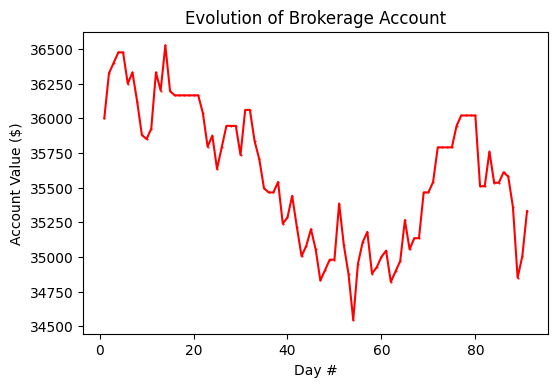

In [ ]:
import random

acct = BrokerageAccount('Warren')
aapl = Stock('AAPL', 350)
msft = Stock('MSFT', 200)
goog = Stock('GOOG', 1500)
acct.buy_stock(aapl, 10)
acct.buy_stock(msft, 20)
acct.buy_stock(goog, 15)
acct.sell_stock(2)
acct.buy_stock(msft, 50)
print(acct)

aapl_probs = [(0.25, 8), (0.6, 0), (0.15, -3)]
msft_probs = [(0.15, 5), (0.7, 0), (0.15, -6)]
goog_probs = [(0.35, 5), (0.5, 0), (0.15, -14)]
accumulate_probs(aapl_probs)
accumulate_probs(msft_probs)
accumulate_probs(goog_probs)

values = [acct.value()]
for i in range(90):
    aapl.price += lookup_event(random.random(), aapl_probs)
    msft.price += lookup_event(random.random(), msft_probs)
    goog.price += lookup_event(random.random(), goog_probs)
    values.append(acct.value())
print(acct)

import matplotlib.pyplot as plt    
fig, ax = plt.subplots()
fig.dpi = 100
ax.set_xlabel('Day #')
ax.set_ylabel('Account Value ($)')
ax.set_title('Evolution of Brokerage Account')
ax.plot(list(range(1, len(values)+1)), values, marker='.', ms=1, color='red', label='')
plt.show()